# 1. 多变量的线性方程
以波士顿房价预测为例
波士顿房价数据集包括506个样本，每个样本包括12个特征变量和该地区的平均房价

# 2. 数据读取

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

%matplotlib inline

# 读取数据文件,并且第一行为数据的开头
df = pd.read_csv("../data/boston housing price.csv", header=0)

# 显示数据摘要描述信息
print(df.describe())

df = np.array(df.values)  # 获取df的值并且转换成 np 的数组格式

y_data = df[:, 12]  # 标签数据

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

# 3. 特征缩放
归一化，将特征缩放在0-1之间

In [2]:
# 归一化
for i in range(12):
    df[:, i] = (df[:, i] - df[:, i].min()) / (df[:, i].max() - df[:, i].min())
x_data = df[:, :12]  # 特征数据

# 4. 构建模型

In [3]:
# 定义训练数据的占位符， x是特征值， y是标签值
x = tf.placeholder(tf.float32, [None, 12], name="X")
y = tf.placeholder(tf.float32, [None, 1], name="Y")

# 创建一个命名空间，定义模型函数 y = w1 * x1 + ... + w12 * x12+b
with tf.name_scope("Model1"):
    # 初始化w为shape=（12,1），服从标准差为0.01的随机正态分布的数
    w = tf.Variable(tf.random_normal([12, 1], stddev=0.01), name="W")
    # 初始化b为1.0
    b = tf.Variable(1.0, name="b")


    # 定义模型函数 y = W * X+ b 矩阵相乘matmul
    def model(x, w, b):
        return tf.matmul(x, w) + b


    # 定义线性函数的预测值
    pred = model(x, w, b)

Instructions for updating:
Colocations handled automatically by placer.


# 5. 训练模型

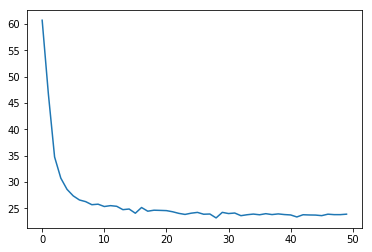

In [4]:
train_epochs = 50  # 迭代次数
learning_rate = 0.01  # 学习率

# 创建一个命名空间，定义损失函数,采用均方差作为损失函数
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.square(y - pred))

# 梯度下降优化器 设置学习率和优化目标损失最小化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

sess = tf.Session()  # 建立会话
init = tf.global_variables_initializer()  # 变量初始化
sess.run(init)

loss_list = []  # 用于保存loss的值
# 迭代训练
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)
        ys = ys.reshape(1, 1)

        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})

        loss_sum = loss_sum + loss  # 累加损失

    x_data, y_data = shuffle(x_data, y_data)  # 打乱数据顺序 避免过拟合假性学习

    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum / len(y_data)  # 所有数据的平均损失
    loss_list.append(loss_average)
plt.plot(loss_list)  # 显示迭代过程中的平均代价
plt.show()  # 显示图表

# 6. 模型预测
随机抽取数据验证：

In [5]:
# 随机抽取数据验证
n = np.random.randint(506)
x_test = x_data[n]
x_test = x_test.reshape(1, 12)

predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)

target = y_data[n]
print("目标值：%f" % target)

预测值：14.972874
目标值：15.100000
